In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [24]:
def list_files(directory):
    try:
        items = os.listdir(directory)

        files = [item for item in items if os.path.isfile(os.path.join(directory, item))]
        return files
    except Exception as e:
        print(f"Error accessing directory: {e}")
        return []

In [25]:
# Read the last file created in the metrics folder
# Retrieve files in the metrics folder
metric_files = list_files('metrics')

# Sort the files by creation date
metric_files.sort(key=lambda x: os.path.getctime(f'metrics/{x}'))

metrics = pd.read_csv(f'metrics/{metric_files[-1]}')
# Create a new column with the total time spent which is the sum of the time spent on each task
metrics['Total time spent (us)'] = metrics['Computation Time (us)'] + metrics['Communication Time (us)'] + metrics['Synchronization Time (us)']

metrics

,Number of Nodes,Computation Time (us),Communication Time (us),Synchronization Time (us),First Map Time (us),First Shuffle Time (us),First Reduce Time (us),Second Map Time (us),Second Shuffle Time (us),Second Reduce Time (us),Total time spent (us)
0,1,22269543,8459920,3837,14568585,2452030,1800104,1219810,216591,4684883,30733300
1,2,13690598,6850721,492,8153406,1851591,1050401,1013290,305679,3473995,20541811
2,3,11793660,6675095,503,5738260,1508238,846075,1233011,450013,3976821,18469258
3,4,10497751,6451716,485,4066267,1201453,825728,1526724,446613,4079521,16949952
4,5,9142770,6266458,552,3451384,1189287,824511,1349910,437079,3517522,15409780
5,6,8227716,5907907,663,3024673,893954,621288,1335861,417555,3246561,14136286
6,7,7617291,5811277,575,2751365,870041,605578,1441832,375454,2819095,13429143
7,8,5923736,6575019,590,2054055,1741277,418373,1330583,273097,2121318,12499345
8,9,4730767,5529131,710,1863895,749485,578498,1088199,279944,1200888,10260608
9,10,4286632,5480355,453,2140958,775591,333128,1024998,203567,788006,9767440


In [26]:
metrics['Non-computation Ratio'] = (metrics['Communication Time (us)'] + metrics['Synchronization Time (us)']) / metrics['Computation Time (us)']
metrics

,Number of Nodes,Computation Time (us),Communication Time (us),Synchronization Time (us),First Map Time (us),First Shuffle Time (us),First Reduce Time (us),Second Map Time (us),Second Shuffle Time (us),Second Reduce Time (us),Total time spent (us),Non-computation Ratio
0,1,22269543,8459920,3837,14568585,2452030,1800104,1219810,216591,4684883,30733300,0.380060
1,2,13690598,6850721,492,8153406,1851591,1050401,1013290,305679,3473995,20541811,0.500432
2,3,11793660,6675095,503,5738260,1508238,846075,1233011,450013,3976821,18469258,0.566033
3,4,10497751,6451716,485,4066267,1201453,825728,1526724,446613,4079521,16949952,0.614627
4,5,9142770,6266458,552,3451384,1189287,824511,1349910,437079,3517522,15409780,0.685461
5,6,8227716,5907907,663,3024673,893954,621288,1335861,417555,3246561,14136286,0.718130
6,7,7617291,5811277,575,2751365,870041,605578,1441832,375454,2819095,13429143,0.762981
7,8,5923736,6575019,590,2054055,1741277,418373,1330583,273097,2121318,12499345,1.110044
8,9,4730767,5529131,710,1863895,749485,578498,1088199,279944,1200888,10260608,1.168910
9,10,4286632,5480355,453,2140958,775591,333128,1024998,203567,788006,9767440,1.278581


In [27]:
serial_total_time = metrics[metrics['Number of Nodes'] == 1]['Total time spent (us)']
serial_total_time = serial_total_time.values[0]
# Calculate the speedup of the parallel version
metrics['speedup'] = serial_total_time / metrics['Total time spent (us)']
metrics

,Number of Nodes,Computation Time (us),Communication Time (us),Synchronization Time (us),First Map Time (us),First Shuffle Time (us),First Reduce Time (us),Second Map Time (us),Second Shuffle Time (us),Second Reduce Time (us),Total time spent (us),Non-computation Ratio,speedup
0,1,22269543,8459920,3837,14568585,2452030,1800104,1219810,216591,4684883,30733300,0.380060,1.000000
1,2,13690598,6850721,492,8153406,1851591,1050401,1013290,305679,3473995,20541811,0.500432,1.496134
2,3,11793660,6675095,503,5738260,1508238,846075,1233011,450013,3976821,18469258,0.566033,1.664025
3,4,10497751,6451716,485,4066267,1201453,825728,1526724,446613,4079521,16949952,0.614627,1.813179
4,5,9142770,6266458,552,3451384,1189287,824511,1349910,437079,3517522,15409780,0.685461,1.994402
5,6,8227716,5907907,663,3024673,893954,621288,1335861,417555,3246561,14136286,0.718130,2.174072
6,7,7617291,5811277,575,2751365,870041,605578,1441832,375454,2819095,13429143,0.762981,2.288553
7,8,5923736,6575019,590,2054055,1741277,418373,1330583,273097,2121318,12499345,1.110044,2.458793
8,9,4730767,5529131,710,1863895,749485,578498,1088199,279944,1200888,10260608,1.168910,2.995271
9,10,4286632,5480355,453,2140958,775591,333128,1024998,203567,788006,9767440,1.278581,3.146505


In [28]:
phase_times = metrics[[
    'Number of Nodes',
    'First Map Time (us)', 
    'First Shuffle Time (us)', 
    'First Reduce Time (us)',
    'Second Map Time (us)',
    'Second Shuffle Time (us)',
    'Second Reduce Time (us)']]

# Change the columns names from us to ms
phase_times.columns = ['Number of Nodes', 'First Map Time (ms)', 'First Shuffle Time (ms)', 'First Reduce Time (ms)', 'Second Map Time (ms)', 'Second Shuffle Time (ms)', 'Second Reduce Time (ms)']

# Convert the time from us to ms but avoid Number of Nodes column
for col in phase_times.columns[1:]:
    phase_times.loc[:, col] = phase_times.loc[:, col] / 1000

# phase_times.to_latex('phase_times.tex', index=False)

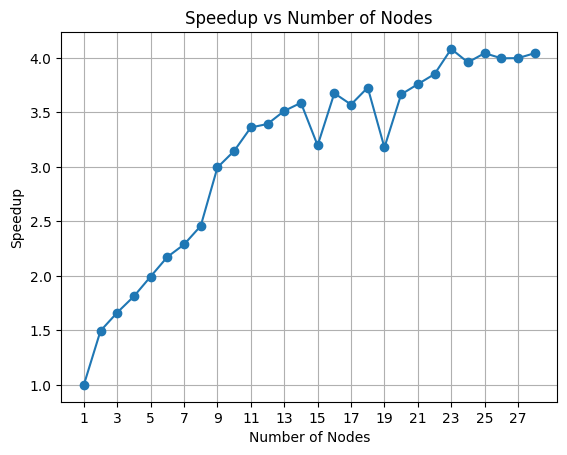

In [29]:
# Plot the speedup
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['speedup'], marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Speedup')
plt.title('Speedup vs Number of Nodes')
plt.grid()
# xticks even numbers
plt.xticks(range(1, 28, 2))
plt.savefig('figures/speedup.png')
plt.show()


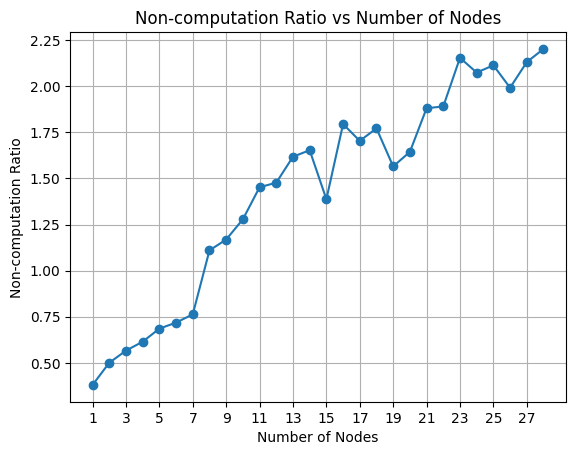

In [33]:
# Plot the non-computation ratio
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['Non-computation Ratio'], marker='o')
plt.xlabel('Number of Nodes')
plt.ylabel('Non-computation Ratio')
plt.title('Non-computation Ratio vs Number of Nodes')
plt.xticks(range(1, 28, 2))
plt.grid()
plt.savefig('figures/non_computation_ratio.png')
plt.show()


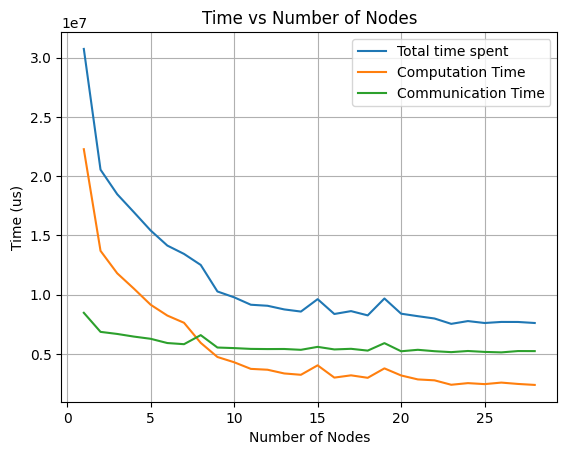

In [31]:
# Plot the total time spent, computation time and communication time
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['Total time spent (us)'], label='Total time spent')
plt.plot(metrics['Number of Nodes'], metrics['Computation Time (us)'], label='Computation Time')
plt.plot(metrics['Number of Nodes'], metrics['Communication Time (us)'], label='Communication Time')
plt.xlabel('Number of Nodes')
plt.ylabel('Time (us)')
plt.title('Time vs Number of Nodes')
plt.legend()
plt.grid()
plt.savefig('figures/time.png')
plt.show()

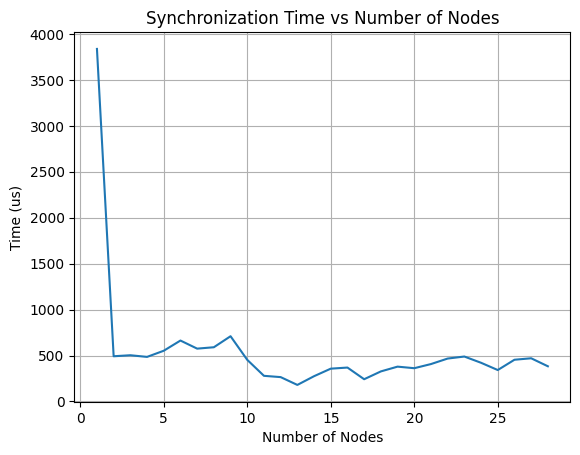

In [32]:
# Plot the synchronization time
plt.figure()
plt.plot(metrics['Number of Nodes'], metrics['Synchronization Time (us)'])
plt.xlabel('Number of Nodes')
plt.ylabel('Time (us)')
plt.title('Synchronization Time vs Number of Nodes')
plt.grid()
plt.savefig('figures/sync_time.png')
plt.show()